In [1]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------

import os
from share.helper_functions import(
    download_if_not_modified_today
)
from share.rogalski_functions import(
    data_voi_df
)
import pandas as pd
from sorcery import dict_of
from share.helper_functions import (
    plot
)

In [2]:
data_dir = './Rogalski_data'
data_file = 'wojewodztwa.csv'
path = os.sep.join([data_dir,data_file])
download_command='./get_voi.sh'

download_if_not_modified_today(path, download_command)
df = pd.read_csv(path)

./Rogalski_data/wojewodztwa.csv exists
./Rogalski_data/wojewodztwa.csv was modified today, not downloading


In [3]:


dfc = data_voi_df(df, 'cases')
dfc

Województwo,04.03.2020,05.03.2020,06.03.2020,07.03.2020,08.03.2020,09.03.2020,10.03.2020,11.03.2020,12.03.2020,13.03.2020,...,27.11.2021,28.11.2021,29.11.2021,30.11.2021,01.12.2021,02.12.2021,03.12.2021,04.12.2021,05.12.2021,06.12.2021
Dolnośląskie,0,0,1,0,1,1,1,0,3,1,...,1870,2047,1074,1458,2159,2345,2396,2070,2248,1408
Kujawsko-Pomorskie,0,0,0,0,0,0,0,0,0,0,...,1363,947,762,1138,1361,1726,1318,1490,1128,526
Lubelskie,0,0,0,0,0,0,1,1,4,1,...,1209,763,383,1111,1264,925,1022,1033,505,285
Lubuskie,1,0,0,0,0,0,0,0,0,0,...,768,663,395,398,656,747,874,660,641,536
Łódzkie,0,0,0,0,0,0,0,1,1,3,...,1600,1207,691,1101,1682,1666,1461,1417,1240,722
Małopolskie,0,0,0,0,0,1,0,0,0,0,...,2143,1736,1136,1526,2570,2327,2236,2255,1910,1290
Mazowieckie,0,0,0,0,2,0,1,1,2,5,...,4730,3294,2749,3185,4806,4048,3731,4270,3469,2116
Opolskie,0,0,0,0,0,0,0,1,1,0,...,727,778,517,399,694,962,947,833,873,502
Podkarpackie,0,0,0,0,0,0,0,1,2,3,...,1022,856,418,833,1080,1060,1050,907,742,365
Podlaskie,0,0,0,0,0,0,0,0,0,0,...,639,404,193,476,672,567,563,469,308,148


In [4]:
dfd = data_voi_df(df, 'deaths')
dfd

Województwo,04.03.2020,05.03.2020,06.03.2020,07.03.2020,08.03.2020,09.03.2020,10.03.2020,11.03.2020,12.03.2020,13.03.2020,...,27.11.2021,28.11.2021,29.11.2021,30.11.2021,01.12.2021,02.12.2021,03.12.2021,04.12.2021,05.12.2021,06.12.2021
Dolnośląskie,0,0,0,0,0,0,0,0,0,1,...,15,0,0,41,32,11,30,18,1,0
Kujawsko-Pomorskie,0,0,0,0,0,0,0,0,0,0,...,29,1,3,34,15,20,22,36,5,6
Lubelskie,0,0,0,0,0,0,0,0,0,0,...,38,0,0,67,66,59,38,42,0,0
Lubuskie,0,0,0,0,0,0,0,0,0,0,...,13,0,2,11,12,14,9,14,2,2
Łódzkie,0,0,0,0,0,0,0,0,0,0,...,33,0,0,31,46,39,25,23,0,0
Małopolskie,0,0,0,0,0,0,0,0,0,0,...,30,3,0,41,49,50,40,51,0,7
Mazowieckie,0,0,0,0,0,0,0,0,0,0,...,67,27,5,49,76,69,52,58,29,1
Opolskie,0,0,0,0,0,0,0,0,0,0,...,8,1,0,16,29,16,20,22,0,0
Podkarpackie,0,0,0,0,0,0,0,0,0,0,...,37,0,4,21,38,20,43,56,2,0
Podlaskie,0,0,0,0,0,0,0,0,0,0,...,17,4,0,47,27,33,22,24,0,0


/home/ochab/anaconda2/envs/python3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


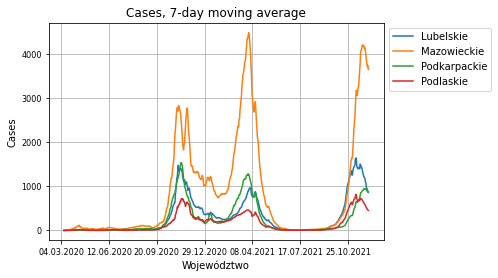

In [16]:
dfq=dfc.T[['Lubelskie', 'Mazowieckie', 'Podkarpackie', 'Podlaskie']].rolling(7).mean()

dfq

plotopts = dict_of(
    plotdf=dfq,
    ylabel = 'Cases',
    title = f'Cases, 7-day moving average',
    fontsize = 8,
    )

plot(**plotopts);